In [5]:
from pathlib import Path
import h5py as h5
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def get_iterate(path=Path("examples/output/parareal/"), n=0):
    files = path.glob(f"fine-{n:04}-*.h5")
    
    def read_snap(filename):
        with h5.File(filename, "r") as f_in:
            n = f_in["data"].attrs["n"]
            t0 = f_in["data"].attrs["t0"]
            t1 = f_in["data"].attrs["t1"]
            t = np.linspace(t0, t1, n + 1)
            data = f_in["data"][:]
            return t, data
        
    snaps = [read_snap(f) for f in sorted(files)]
    t = np.concatenate([s[0] for s in snaps], axis=0)
    x = np.concatenate([s[1] for s in snaps], axis=0)
    return t, x

In [7]:
t_euler, x_euler = get_iterate(path=Path("examples/output/euler/"))

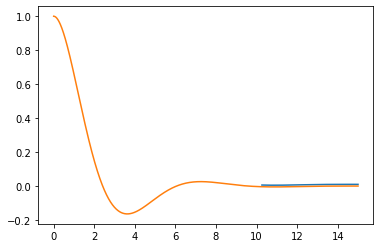

In [13]:
t, x = get_iterate(n=14)
plt.plot(t, x[:,0]+0.01)
plt.plot(t_euler, x_euler[:,0])